In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
#Constants
FOLDER_PATH = '/Users/AnshulSrivastava/Desktop/IPF/PI Data/CSVs'
SEED = 42

In [3]:
# Helper Functions

# Make baseline predictions
# Use previous time step to generate baseline predictions
def baseline_model(test):
    predictions = []
    for t in range(1, len(test)):
        yhat = test[t-1]
        predictions.append(yhat)
    
    return predictions

# #Iterate through the test set for dynamic forecasting every 10 steps
# def forecast(df, train_size, time_step):
#     predictions = []
#     train, test = df['Watt Hours Received'][:train_size].values.tolist(), df['Watt Hours Received'][train_size:].values.tolist()

#     for t in tqdm(range(0, len(test), time_step)):
#         model = ARIMA(train, order=(1, 1, 2), enforce_stationarity=False, enforce_invertibility=False) 
#         model_fit = model.fit()
#         yhat = model_fit.forecast(steps=time_step)
#         predictions.extend(yhat)
#         obs = test[t:t+time_step]
#         train.extend(obs)
#     return predictions

# Plot test predictions vs actual
def plot_predictions(test, predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted', linestyle='dashed')
    plt.title('Test Set Predictions')
    plt.legend()
    plt.show()

# Plot difference between true and predicted values
def plot_difference(df, test, predictions, train_size):
    plt.figure(figsize=(18, 6))
    plt.subplot(121)
    plt.plot(df['Timestamp'].loc[train_size+1:], np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error')
    plt.axhline(np.median(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100), color='red', linestyle='dashed', label='Median Percentage Error')
    plt.title('Percentage Error between True and Predicted')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.subplot(122)
    sns.histplot(np.abs(np.array(test) - np.array(predictions[0:1404]))/np.array(test)*100, label='Percentage Error', kde=True, bins=25)
    plt.title('Percentage Error Distribution')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


## FRIB

In [4]:
# Load data
frib = pd.read_csv(FOLDER_PATH + '/FRIB.csv')

In [5]:
# Check for missing values
na_mask = frib['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in FRIB data')

# Remove cumulative values
frib['Watt Hours Received'] = frib['Watt Hours Received'].diff()

# Drop the first row
frib = frib.dropna()

Found 0 missing values in FRIB data


In [7]:
# Convert to datetime
frib['Timestamp'] = pd.to_datetime(frib['Timestamp'])
frib.dtypes

Watt Hours Received           float64
Timestamp              datetime64[ns]
dtype: object

In [8]:
# Train test split
train_size = int(len(frib) * 0.8)
train, test = frib['Watt Hours Received'][:train_size].values.tolist(), frib['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.025
Test MAPE: 0.005


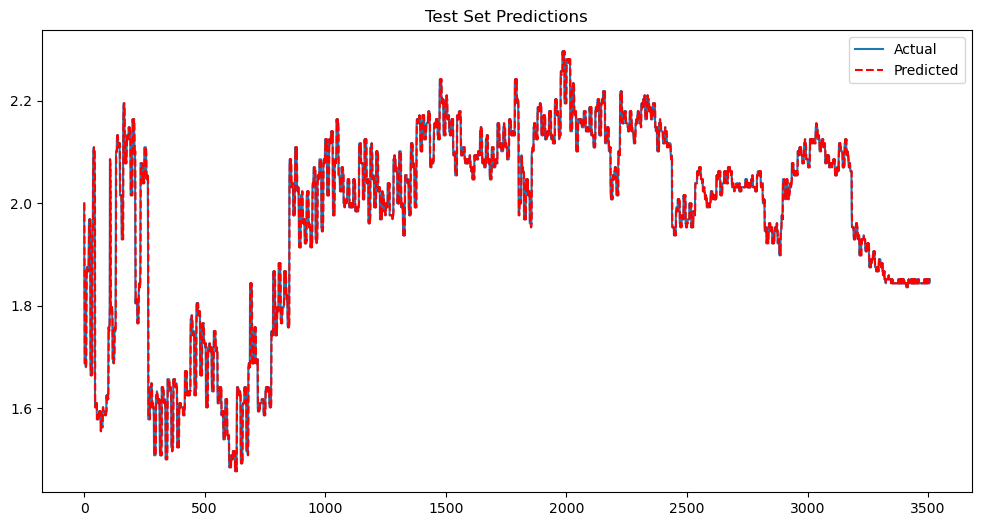

In [9]:
# Plot predictions
plot_predictions(test[1:], predictions)

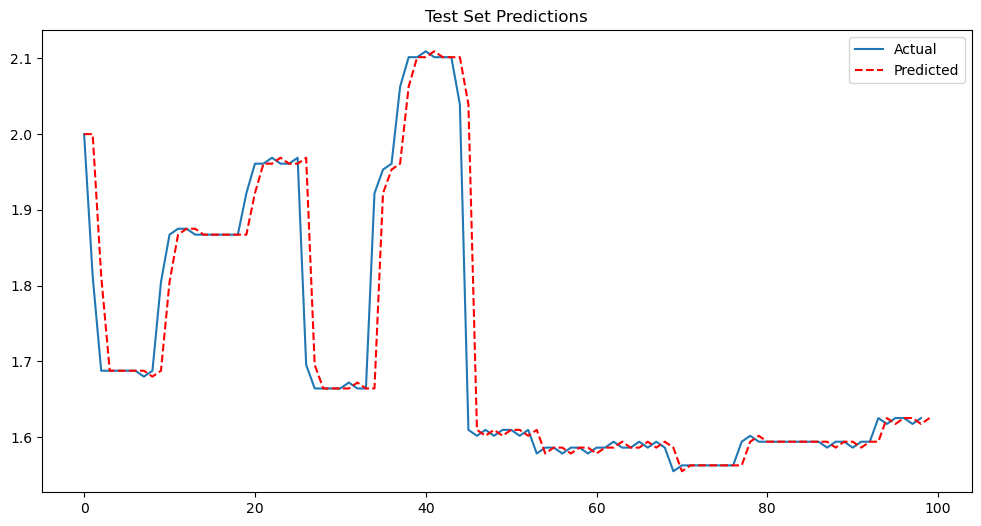

In [10]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

In [11]:
# Sum up first 30 days of actual and predicted values
print('Actual:', sum(frib['Watt Hours Received'][:24*30]))

Actual: 1295.671875


## BCC

In [12]:
bcc = pd.read_csv(FOLDER_PATH + '/BCC.csv')

In [13]:
#Check for NaN values
bcc['Watt Hours Received'] = pd.to_numeric(bcc['Watt Hours Received'], errors='coerce')
na_mask = bcc['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} NaN values in BCC data')
print(f'Lenght of BCC data before dropping NaN values: {len(bcc)}')

Found 18 NaN values in BCC data
Lenght of BCC data before dropping NaN values: 17543


In [14]:
#Drop NaN values
bcc = bcc.dropna(subset=['Watt Hours Received'])

In [15]:
# Remove cumulative values
bcc['Watt Hours Received'] = bcc['Watt Hours Received'].diff()

# Drop the first row
bcc = bcc.dropna()

# Convert to datetime
bcc['Timestamp'] = pd.to_datetime(bcc['Timestamp'])

In [16]:
# Train test split
train_size = int(len(bcc) * 0.8)
train, test = bcc['Watt Hours Received'][:train_size].values.tolist(), bcc['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.015
Test MAPE: 0.043


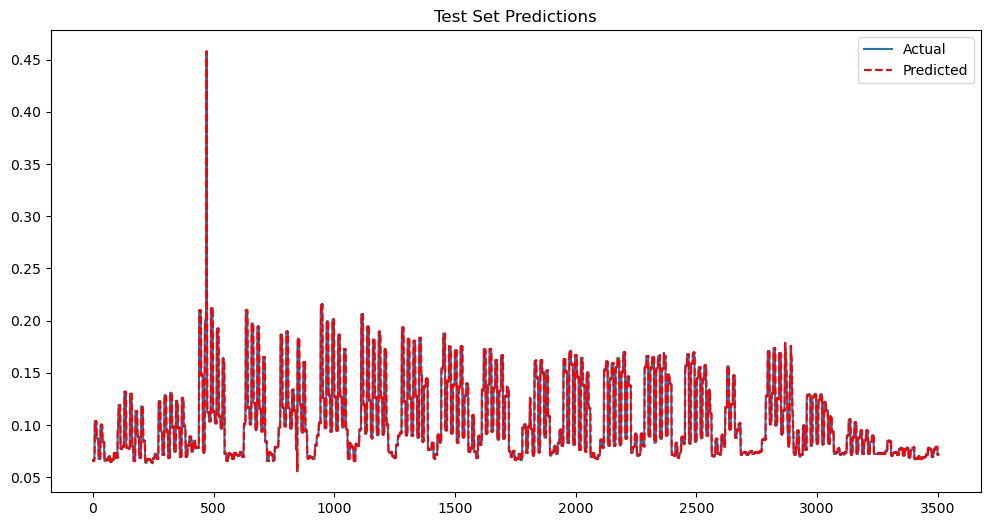

In [17]:
# Plot predictions
plot_predictions(test[1:], predictions)

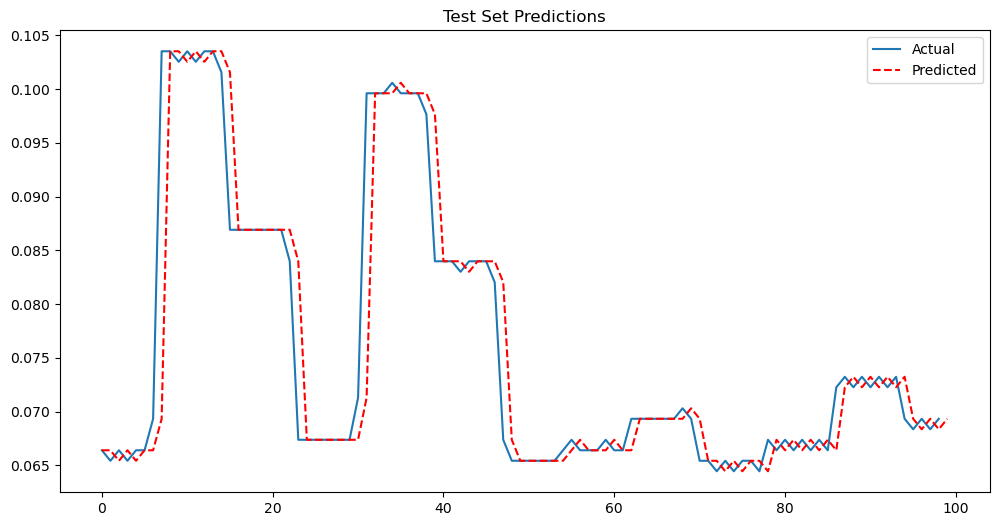

In [18]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

## BPS Data

In [19]:
# Load data
bps = pd.read_csv(FOLDER_PATH + '/BPS.csv')

In [20]:
# Check for missing values
na_mask = bps['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in bps data')

# Remove cumulative values
bps['Watt Hours Received'] = bps['Watt Hours Received'].diff()

# Drop the first row
bps = bps.dropna()

Found 0 missing values in bps data


In [21]:
# Convert to datetime
bps['Timestamp'] = pd.to_datetime(bps['Timestamp'])

In [22]:
# Train test split
train_size = int(len(bps) * 0.8)
train, test = bps['Watt Hours Received'][:train_size].values.tolist(), bps['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.017
Test MAPE: 0.027


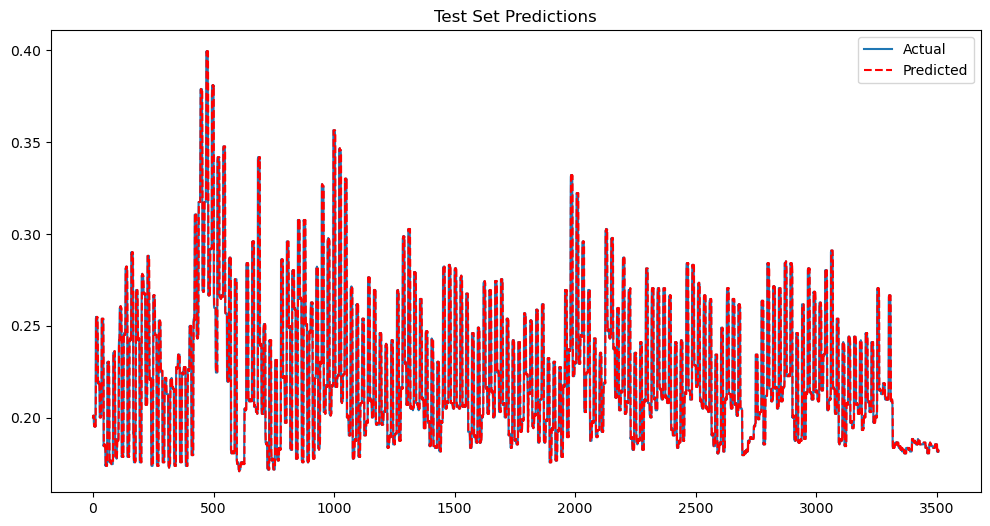

In [23]:
# Plot predictions
plot_predictions(test[1:], predictions)

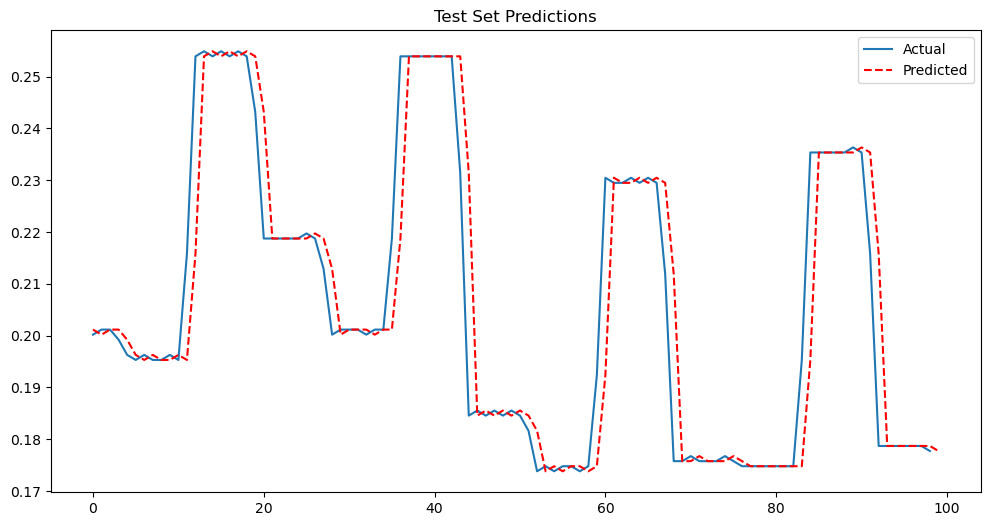

In [24]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

## Chem Data

In [25]:
# Load data
chem = pd.read_csv(FOLDER_PATH + '/Chem.csv')

In [26]:
# Calc Failed Mask
failed_mask = chem['Watt Hours Received'] == 'Calc Failed'
print(f'Found {failed_mask.sum()} Calc Failed values in Chem data')

chem[failed_mask]

Found 24 Calc Failed values in Chem data


,Watt Hours Received,Timestamp
1407,Calc Failed,2023-02-28 15:00:00
1408,Calc Failed,2023-02-28 16:00:00
1411,Calc Failed,2023-02-28 19:00:00
1412,Calc Failed,2023-02-28 20:00:00
1414,Calc Failed,2023-02-28 22:00:00
1419,Calc Failed,2023-03-01 03:00:00
1427,Calc Failed,2023-03-01 11:00:00
1428,Calc Failed,2023-03-01 12:00:00
1431,Calc Failed,2023-03-01 15:00:00
1443,Calc Failed,2023-03-02 03:00:00


Scattered throughout, can be dropped

In [27]:
# Convert to numeric
chem['Watt Hours Received'] = pd.to_numeric(chem['Watt Hours Received'], errors='coerce')

In [28]:
# Check for missing values
na_mask = chem['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in chem data')

# Drop NaN values
chem = chem.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
chem['Watt Hours Received'] = chem['Watt Hours Received'].diff()

# Drop the first row
chem = chem.dropna()

# Convert to datetime
chem['Timestamp'] = pd.to_datetime(chem['Timestamp'])

Found 24 missing values in chem data


In [29]:
# Train test split
train_size = int(len(chem) * 0.8)
train, test = chem['Watt Hours Received'][:train_size].values.tolist(), chem['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.004
Test MAPE: 0.013


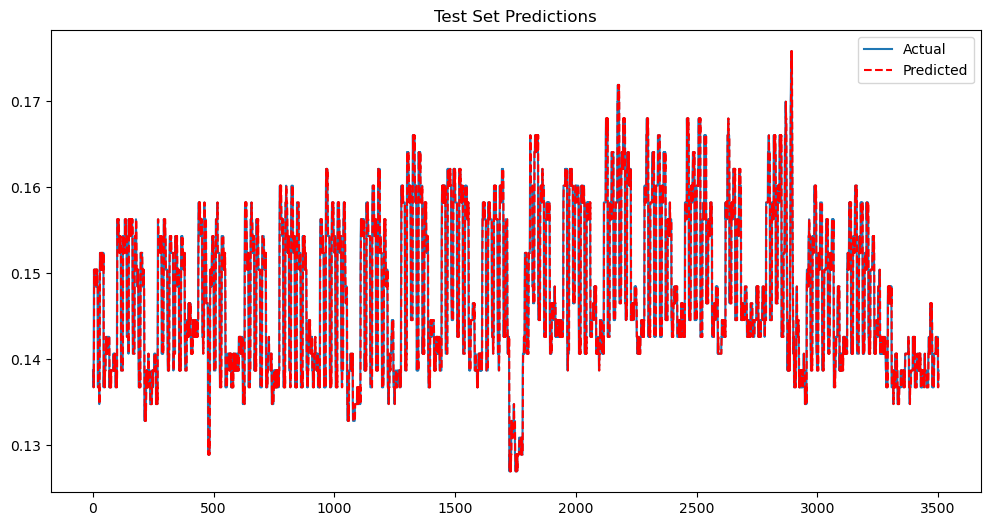

In [30]:
# Plot predictions
plot_predictions(test[1:], predictions)

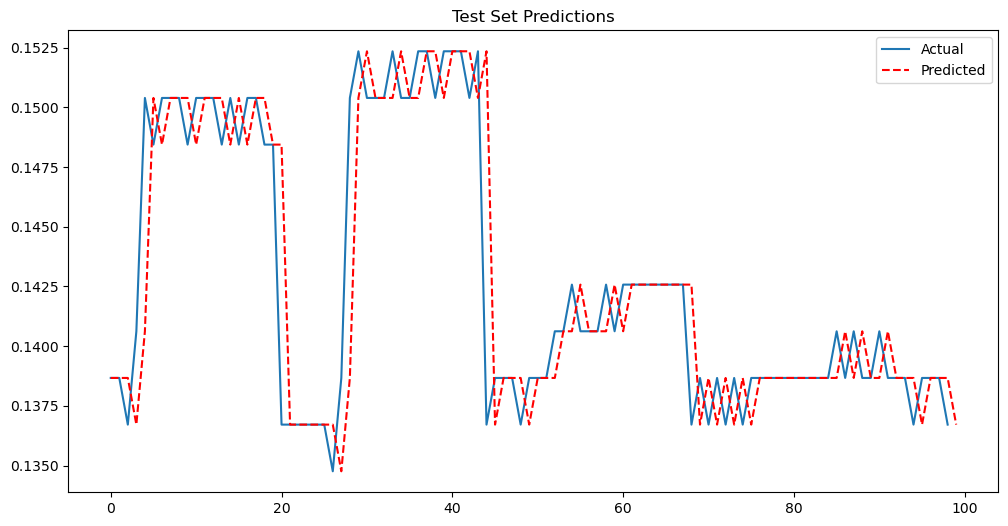

In [31]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

## Engineering Data

In [32]:
# Load Data
eng = pd.read_csv(FOLDER_PATH + '/Eng.csv')

In [33]:
# Calc Failed Mask
failed_mask = eng['Watt Hours Received'] == 'Calc Failed'
print(f'Found {failed_mask.sum()} Calc Failed values in eng data')

eng[failed_mask]

Found 1456 Calc Failed values in eng data


,Watt Hours Received,Timestamp
576,Calc Failed,2023-01-25 00:00:00
8088,Calc Failed,2023-12-04 00:00:00
11113,Calc Failed,2024-04-08 01:00:00
11114,Calc Failed,2024-04-08 02:00:00
11115,Calc Failed,2024-04-08 03:00:00
...,...,...
12562,Calc Failed,2024-06-07 10:00:00
12563,Calc Failed,2024-06-07 11:00:00
12564,Calc Failed,2024-06-07 12:00:00
12565,Calc Failed,2024-06-07 13:00:00


In [34]:
# Split the data based on the failed mask
eng1 = eng.iloc[:11113]
eng2 = eng.iloc[12567:]

# Convert to numeric
eng1['Watt Hours Received'] = pd.to_numeric(eng1['Watt Hours Received'], errors='coerce')

eng2['Watt Hours Received'] = pd.to_numeric(eng2['Watt Hours Received'], errors='coerce')

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_59951/1927974519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng1['Watt Hours Received'] = pd.to_numeric(eng1['Watt Hours Received'], errors='coerce')
/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_59951/1927974519.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng2['Watt Hours Received'] = pd.to_numeric(eng2['Watt Hours Received'], errors='coerce')


In [35]:
# # Check for missing values
na_mask = eng1['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in eng1 data')

# Drop NaN values
eng1 = eng1.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
eng1['Watt Hours Received'] = eng1['Watt Hours Received'].diff()

# Drop the first row
eng1 = eng1.dropna()

# Convert to datetime
eng1['Timestamp'] = pd.to_datetime(eng1['Timestamp'])

Found 2 missing values in eng1 data


In [36]:
# Check for missing values
na_mask = eng2['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in eng2 data')

# Drop NaN values
eng2 = eng2.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
eng2['Watt Hours Received'] = eng2['Watt Hours Received'].diff()

# Drop the first row
eng2 = eng2.dropna()

# Convert to datetime
eng2['Timestamp'] = pd.to_datetime(eng2['Timestamp'])

Found 0 missing values in eng2 data


In [37]:
# Train test split
train_size = int(len(eng1) * 0.8)
train, test = eng1['Watt Hours Received'][:train_size].values.tolist(), eng1['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.002
Test MAPE: 10891155250.382


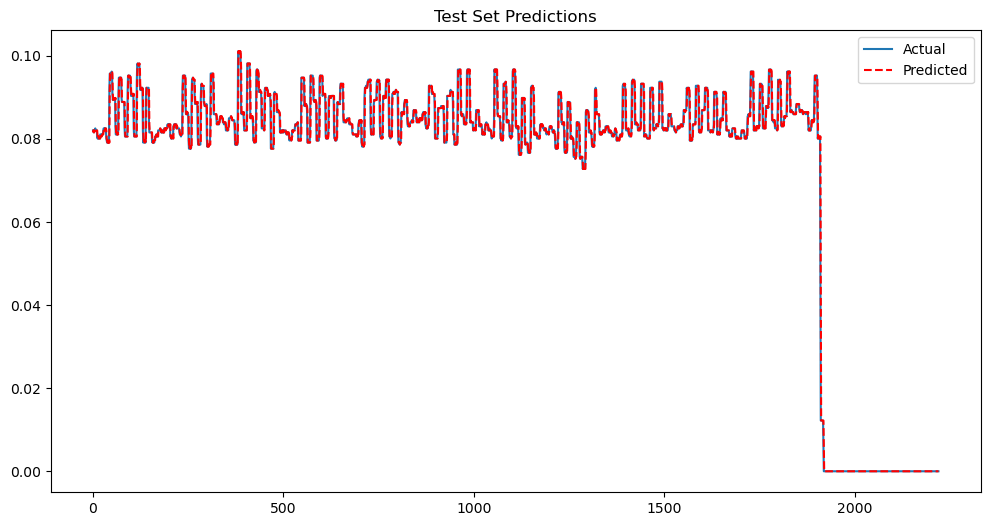

In [38]:
# Plot predictions
plot_predictions(test[1:], predictions)

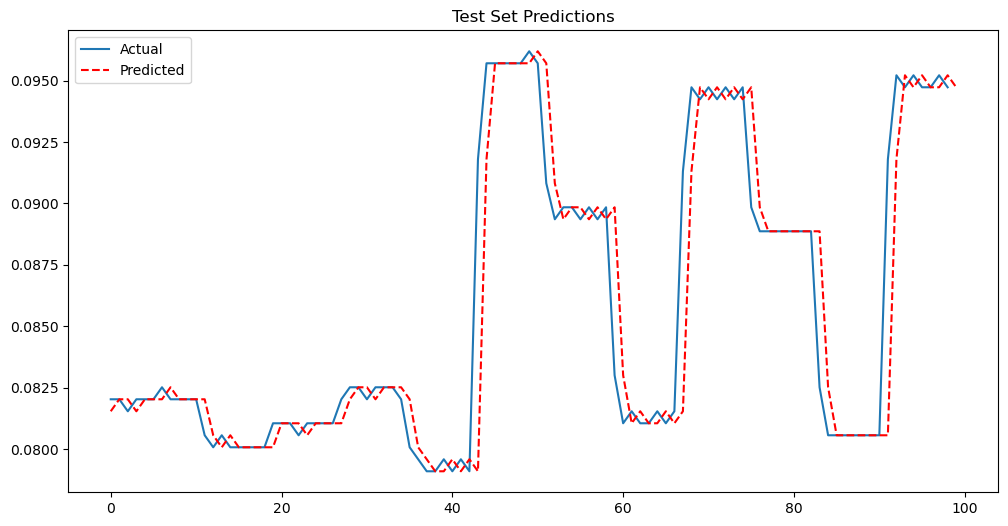

In [39]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

In [40]:
# Train test split
train_size = int(len(eng2) * 0.8)
train, test = eng2['Watt Hours Received'][:train_size].values.tolist(), eng2['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.002
Test MAPE: 0.011


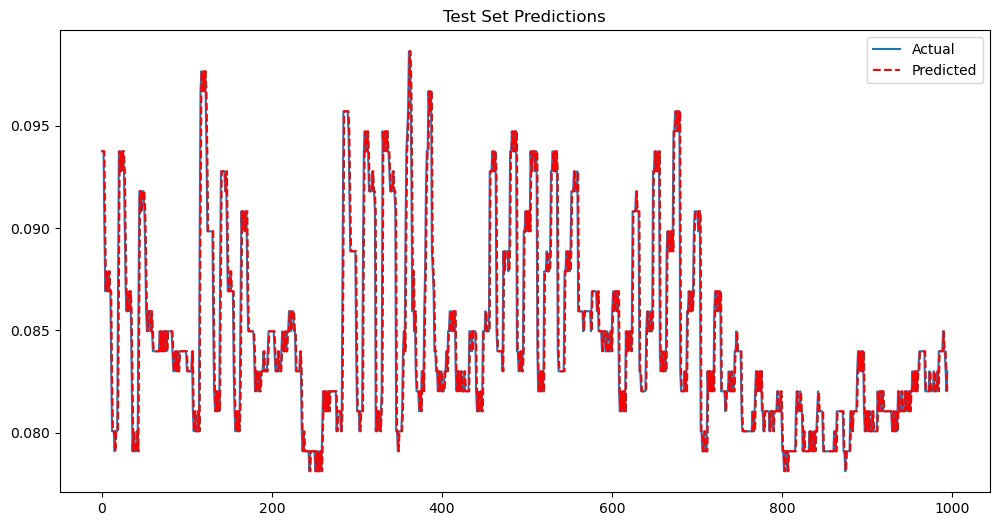

In [41]:
# Plot predictions
plot_predictions(test[1:], predictions)

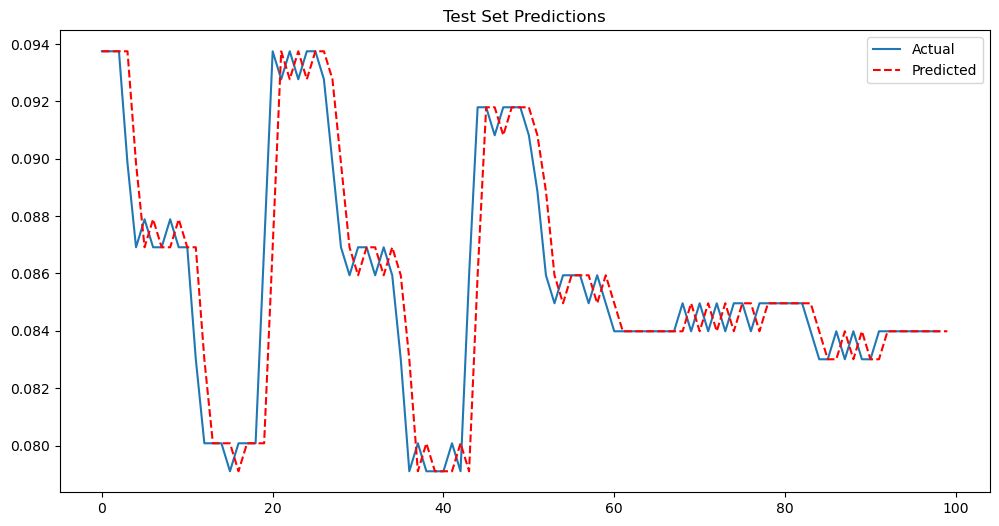

In [42]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

## Plant and Soil Sciences Data

In [43]:
pss = pd.read_csv(FOLDER_PATH + '/PSS.csv')

In [44]:
# Calc Failed Mask
failed_mask = pss['Watt Hours Received'] == 'Calc Failed'
print(f'Found {failed_mask.sum()} Calc Failed values in eng data')

pss[failed_mask]

Found 4 Calc Failed values in eng data


,Watt Hours Received,Timestamp
9346,Calc Failed,2024-01-25 10:00:00
9347,Calc Failed,2024-01-25 11:00:00
9348,Calc Failed,2024-01-25 12:00:00
9349,Calc Failed,2024-01-25 13:00:00


In [45]:
# Convert to numeric
pss['Watt Hours Received'] = pd.to_numeric(pss['Watt Hours Received'], errors='coerce')

In [46]:
# Check for missing values
na_mask = pss['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in pss data')

# Drop NaN values
pss = pss.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
pss['Watt Hours Received'] = pss['Watt Hours Received'].diff()

# Drop the first row
pss = pss.dropna()

# Convert to datetime
pss['Timestamp'] = pd.to_datetime(pss['Timestamp'])

Found 4 missing values in pss data


In [47]:
# Train test split
train_size = int(len(pss) * 0.8)
train, test = pss['Watt Hours Received'][:train_size].values.tolist(), pss['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.005
Test MAPE: 0.008


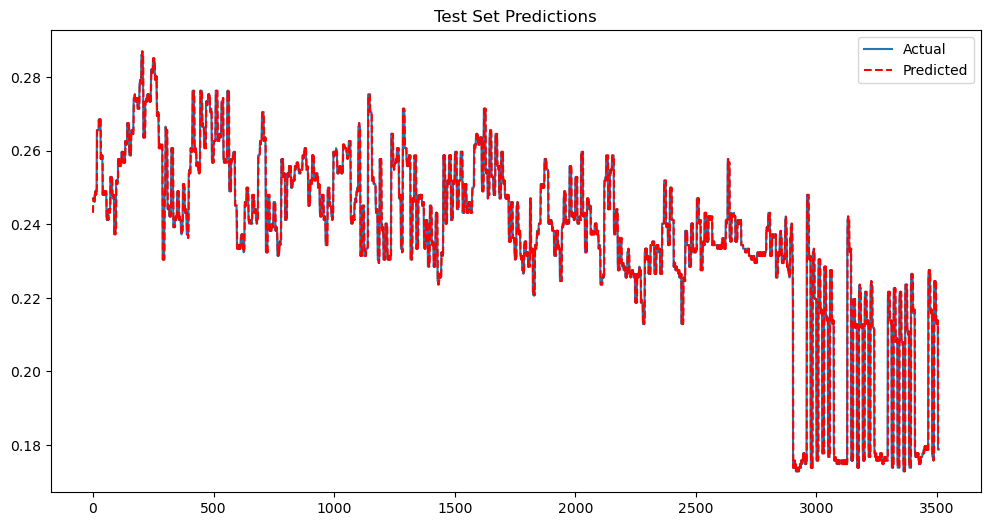

In [48]:
# Plot predictions
plot_predictions(test[1:], predictions)

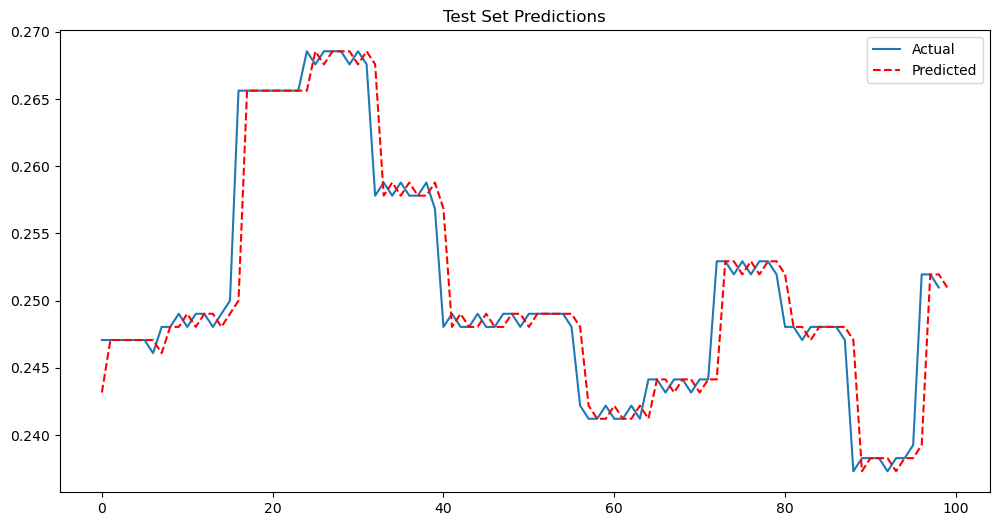

In [49]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

In [52]:
month_mask = pss['Timestamp'] < '2023-02-01'
pss_month = pss[month_mask]
print('Monthly Consumption:', sum(pss_month['Watt Hours Received']))

Monthly Consumption: 191.1279296875


In [54]:
month_mask = ((pss['Timestamp'] < '2023-03-01') & (pss['Timestamp'] >= '2023-02-01'))
pss_month = pss[month_mask]
print('Monthly Consumption:', sum(pss_month['Watt Hours Received']))

Monthly Consumption: 173.6689453125


Looks like the units here are MWh (megawatt-hours)

## Computer Center Data

In [118]:
# Load data
cc = pd.read_csv(FOLDER_PATH + '/CC.csv')

In [119]:
# Calc Failed Mask
failed_mask = cc['Watt Hours Received'] == 'Calc Failed'
print(f'Found {failed_mask.sum()} Calc Failed values in CC data')

cc[failed_mask]

Found 643 Calc Failed values in CC data


,Timestamp,Watt Hours Received
942,2023-02-09 08:00:00,Calc Failed
6132,2023-09-13 15:00:00,Calc Failed
6133,2023-09-13 16:00:00,Calc Failed
6134,2023-09-13 17:00:00,Calc Failed
6135,2023-09-13 18:00:00,Calc Failed
...,...,...
6818,2023-10-12 05:00:00,Calc Failed
6819,2023-10-12 06:00:00,Calc Failed
6820,2023-10-12 07:00:00,Calc Failed
6821,2023-10-12 08:00:00,Calc Failed


In [120]:
cc1 = cc.iloc[:6131]
cc2 = cc.iloc[6823:]

# Convert to numeric
cc1['Watt Hours Received'] = pd.to_numeric(cc1['Watt Hours Received'], errors='coerce')

cc2['Watt Hours Received'] = pd.to_numeric(cc2['Watt Hours Received'], errors='coerce')

/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_99000/607291112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc1['Watt Hours Received'] = pd.to_numeric(cc1['Watt Hours Received'], errors='coerce')
/var/folders/tl/w9hfhthx2q9drpztnsz6w5y80000gn/T/ipykernel_99000/607291112.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc2['Watt Hours Received'] = pd.to_numeric(cc2['Watt Hours Received'], errors='coerce')


In [121]:
# # Check for missing values
na_mask = cc1['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in cc1 data')

# Drop NaN values
cc1 = cc1.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
cc1['Watt Hours Received'] = cc1['Watt Hours Received'].diff()

# Drop the first row
cc1 = cc1.dropna()

# Convert to datetime
cc1['Timestamp'] = pd.to_datetime(cc1['Timestamp'])

Found 1 missing values in cc1 data


In [122]:
# # Check for missing values
na_mask = cc2['Watt Hours Received'].isna()
print(f'Found {na_mask.sum()} missing values in cc2 data')

# Drop NaN values
cc2 = cc2.dropna(subset=['Watt Hours Received'])

# Remove cumulative values
cc2['Watt Hours Received'] = cc2['Watt Hours Received'].diff()

# Drop the first row
cc2 = cc2.dropna()

# Convert to datetime
cc2['Timestamp'] = pd.to_datetime(cc2['Timestamp'])

Found 0 missing values in cc2 data


In [123]:
# Train test split
train_size = int(len(cc1) * 0.8)
train, test = cc1['Watt Hours Received'][:train_size].values.tolist(), cc1['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.008
Test MAPE: 0.018


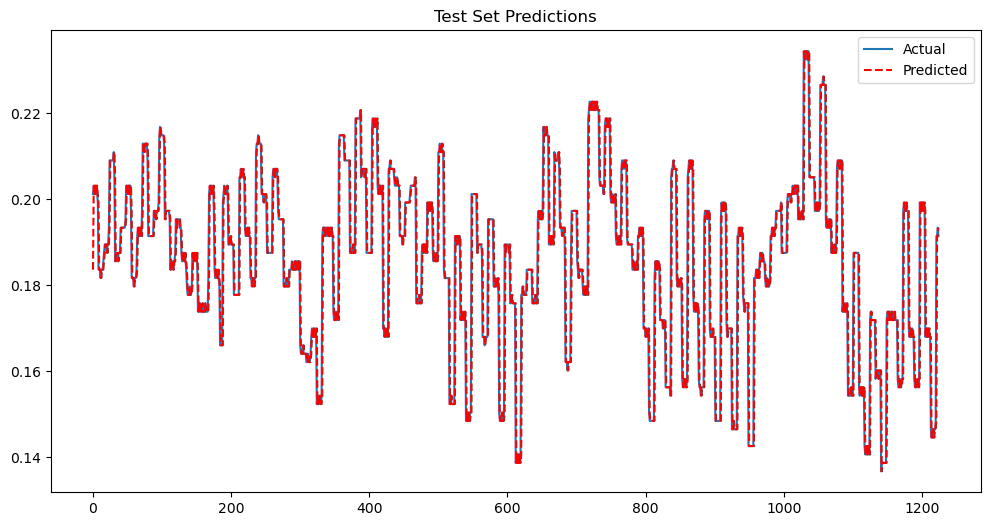

In [124]:
# Plot predictions
plot_predictions(test[1:], predictions)

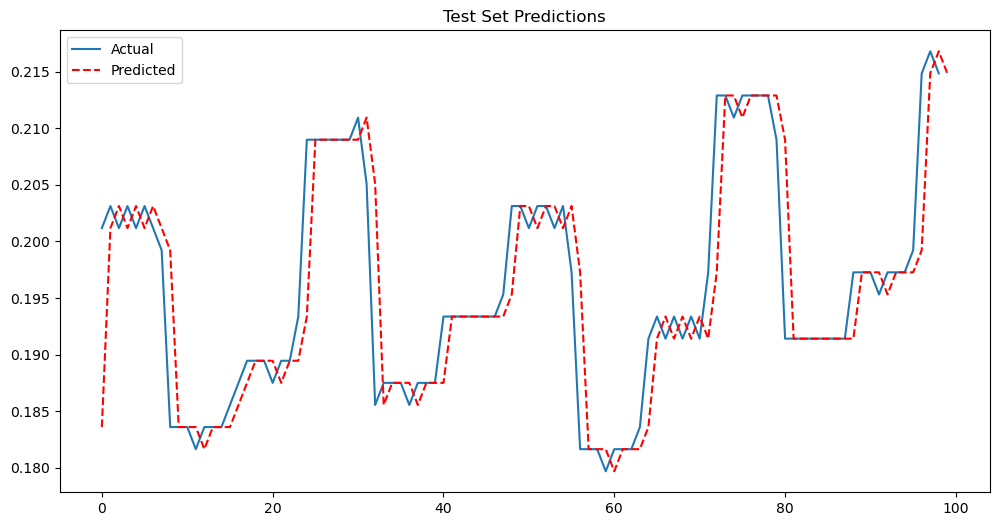

In [125]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])

In [126]:
# Train test split
train_size = int(len(cc2) * 0.8)
train, test = cc2['Watt Hours Received'][:train_size].values.tolist(), cc2['Watt Hours Received'][train_size:].values.tolist()

# Baseline model
predictions = baseline_model(test)

# Calculate RMSE
error = np.sqrt(mean_squared_error(test[1:], predictions))
percentage_error = mean_absolute_percentage_error(test[1:], predictions)
print('Test RMSE: %.3f' % error)
print('Test MAPE: %.3f' % percentage_error)

Test RMSE: 0.008
Test MAPE: 0.025


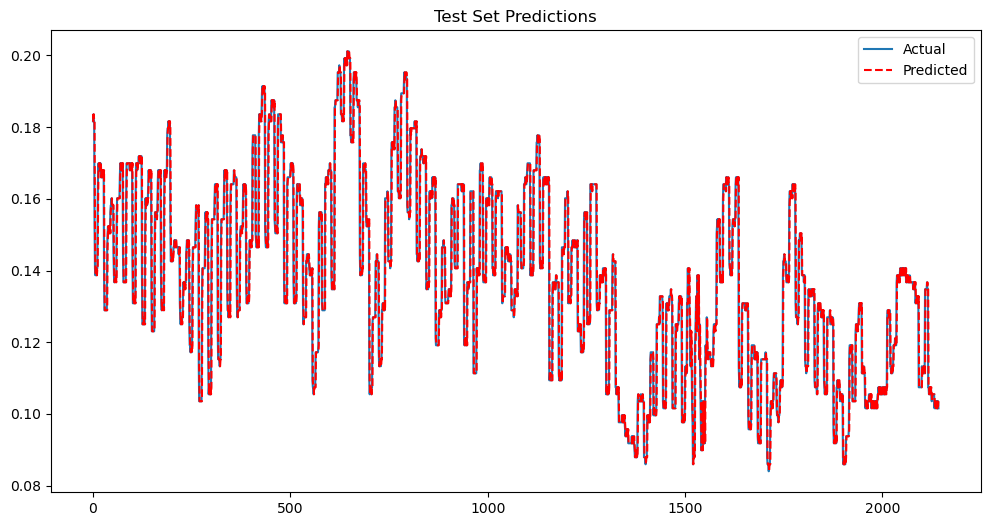

In [127]:
# Plot predictions
plot_predictions(test[1:], predictions)

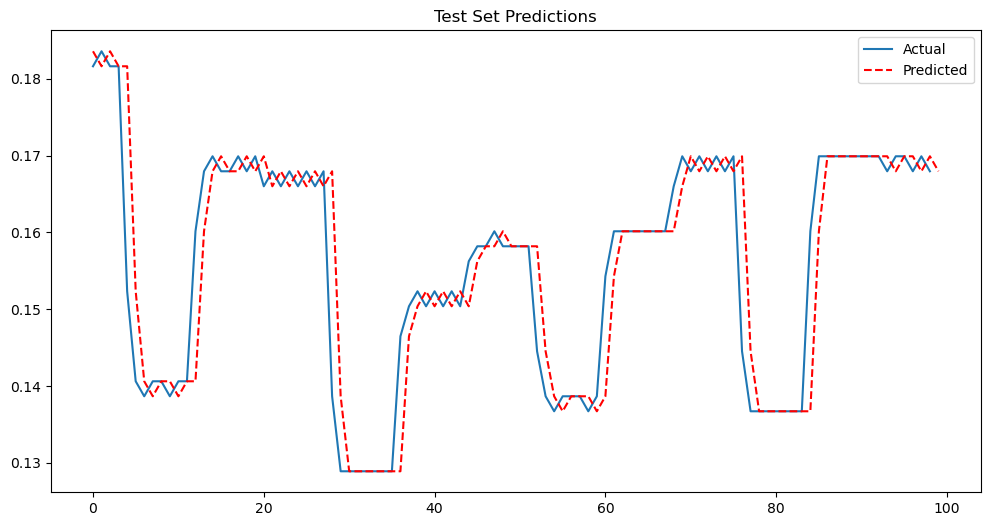

In [128]:
# Zoom in on the first 100 predictions
plot_predictions(test[1:100], predictions[:100])